Largely based on https://blog.keras.io/building-autoencoders-in-keras.html

Using a U-Net based architecture (https://arxiv.org/abs/1505.04597)

In [1]:
import numpy as np
import os
from matplotlib import pyplot as plt
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization
from keras.models import Model
from keras import backend as K
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [2]:
size = 1

In [3]:
(x_train_val, y_train_val), (x_test, y_test) = cifar10.load_data()

x_train_val = x_train_val.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [4]:
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, random_state=314159)

In [5]:
input_img = Input(shape=(x_train.shape[1], x_train.shape[2], x_train.shape[3]))

x = Conv2D(8 * size, (3, 3), activation='relu', padding='same')(input_img)
x = Conv2D(8 * size, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(8 * size, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(16 * size, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(16 * size, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(16 * size, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(32 * size, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(32 * size, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(32 * size, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64 * size, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(64 * size, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(64 * size, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Conv2D(128 * size, (3, 3), activation='relu', padding='same')(x)
# x = Conv2D(128 * size, (3, 3), activation='relu', padding='same')(x)
# x = Conv2D(128 * size, (3, 3), activation='relu', padding='same')(x)
# x = BatchNormalization()(x)

encoded = MaxPooling2D((2, 2))(x)

x = Dense(128 * size, activation='relu')(encoded)
x = Dense(128 * size, activation='relu')(x)
x = Dense(128 * size, activation='relu')(x)
# x = Conv2D(128 * size, (3, 3), activation='relu', padding='same')(x)
# x = Conv2D(128 * size, (3, 3), activation='relu', padding='same')(x)
# x = Conv2D(128 * size, (3, 3), activation='relu', padding='same')(x)
# x = BatchNormalization()(x)
x = UpSampling2D((2, 2))(x)
# x = Conv2D(64 * size, (3, 3), activation='relu', padding='same')(x)
# x = Conv2D(64 * size, (3, 3), activation='relu', padding='same')(x)
# x = Conv2D(64 * size, (3, 3), activation='relu', padding='same')(x)
# x = BatchNormalization()(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32 * size, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(32 * size, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(32 * size, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16 * size, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(16 * size, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(16 * size, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8 * size, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(8 * size, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(8 * size, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = UpSampling2D((2, 2))(x)

decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

In [6]:
earlystopping = EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True)

In [7]:
encoder = Model(input_img, encoded)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [8]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 8)         224       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 8)         584       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 8)         584       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 8)         32        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 16)        1168      
__________

In [9]:
autoencoder.fit(x_train, x_train,
                epochs=1000,
                batch_size=64,
                shuffle=True,
                validation_data=(x_val, x_val), 
                callbacks=[earlystopping])

Train on 37500 samples, validate on 12500 samples
Epoch 1/1000
37500/37500 [==============================] - 10s 258us/step - loss: 0.6266 - val_loss: 0.6730
Epoch 2/1000
37500/37500 [==============================] - 8s 208us/step - loss: 0.6082 - val_loss: 0.6657
Epoch 3/1000
37500/37500 [==============================] - 7s 195us/step - loss: 0.6037 - val_loss: 0.6569
Epoch 4/1000
37500/37500 [==============================] - 7s 195us/step - loss: 0.6017 - val_loss: 0.6375
Epoch 5/1000
37500/37500 [==============================] - 8s 209us/step - loss: 0.6005 - val_loss: 0.6541
Epoch 6/1000
37500/37500 [==============================] - 7s 194us/step - loss: 0.5965 - val_loss: 0.6480
Epoch 7/1000
37500/37500 [==============================] - 8s 202us/step - loss: 0.5946 - val_loss: 0.6081
Epoch 8/1000
37500/37500 [==============================] - 8s 210us/step - loss: 0.5935 - val_loss: 0.6188
Epoch 9/1000
37500/37500 [==============================] - 7s 198us/step - loss: 0.5

Epoch 76/1000
37500/37500 [==============================] - 7s 196us/step - loss: 0.5836 - val_loss: 0.5852
Epoch 77/1000
37500/37500 [==============================] - 7s 197us/step - loss: 0.5836 - val_loss: 0.5898
Epoch 78/1000
37500/37500 [==============================] - 7s 197us/step - loss: 0.5835 - val_loss: 0.5891
Epoch 79/1000
37500/37500 [==============================] - 7s 196us/step - loss: 0.5836 - val_loss: 0.5870


In [10]:
decoded_imgs = autoencoder.predict(x_test)

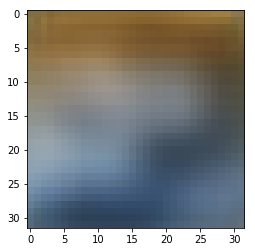

In [11]:
plt.imshow(decoded_imgs[0])

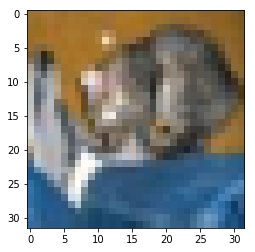

In [12]:
plt.imshow(x_test[0])

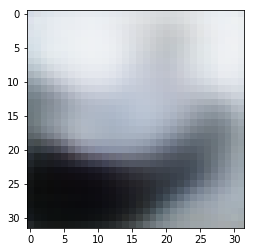

In [13]:
plt.imshow(decoded_imgs[1])

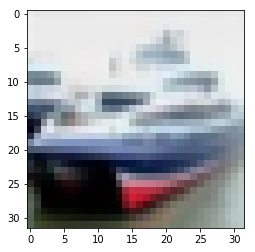

In [14]:
plt.imshow(x_test[1])

In [15]:
encoded_imgs = encoder.predict(x_train_val)

In [16]:
encoded_imgs.shape

(50000, 1, 1, 64)

In [17]:
encoded_imgs = encoded_imgs.reshape(encoded_imgs.shape[0], 
                                    encoded_imgs.shape[1] *
                                    encoded_imgs.shape[2] * 
                                    encoded_imgs.shape[3])

In [18]:
encoded_imgs.shape

(50000, 64)

In [19]:
np.save('encode-features-flat.npy', encoded_imgs)